In [222]:
import os #Intraction local system directories
import pandas as pd #Data processing
import numpy as np #Linear alfrom sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
%matplotlib inline 

In [223]:
os.chdir('C:/Users/Sridhar/Desktop/Bike renting')
bike_rent = pd.read_csv('day.csv', sep = ',')
os.getcwd()

'C:\\Users\\Sridhar\\Desktop\\Bike renting'

In [224]:
bike_rent.shape

(731, 16)

In [225]:
bike_rent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Eploratory Data Analysis

In [226]:
# Extracting day from the dteday column
splitted_date = bike_rent.dteday.str.split("-")
bike_rent['day'] = [date[2] for date in splitted_date]
bike_rent.day = bike_rent.day.astype('int')
# Dropping dteday column i.e, date because day, month and year has been extracted from the date
bike_rent = bike_rent.drop(labels="dteday", axis=1)

In [227]:
bike_rent.dtypes #checking datatypes 

instant         int64
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day             int32
dtype: object

In [228]:
#changing data types 
for i in ['season' , 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    bike_rent[i] = bike_rent[i].astype('category')
bike_rent.dtypes

instant          int64
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
day              int32
dtype: object

In [229]:
#understanding the data
bike_rent.shape #contains (731, 16)
bike_rent.describe() #data  consist of Integers , Float  and Object(categorical) variables

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [230]:
#Numerical columns
numerical_columns = bike_rent.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['instant',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day']

In [231]:
#Categorical columns
categorical_columns = bike_rent.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_columns

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## Missing Value Analysis

In [232]:
#missing value analysis
total = bike_rent.isnull().sum().sort_values(ascending=False)
percent = (bike_rent.isnull().sum()/bike_rent.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
## There are NO Missing Values in our Data

,Total,Percent
day,0,0.0
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0


## Visulisation Of Data

### Univariate Analysis

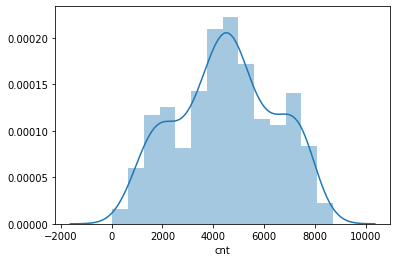

In [233]:
# Target variable  analysis
#Check whether target variable is normal or not
sns.distplot(bike_rent['cnt']);

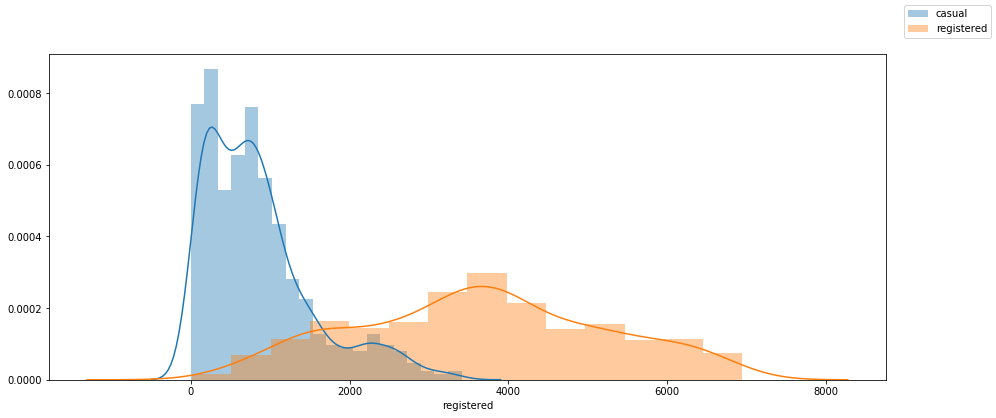

In [234]:
#Check whether  variable 'casual'is normal or not
fig = plt.figure(figsize=(15,6))
sns.distplot(bike_rent['casual']);
#Check whether  variable 'registered'is normal or not
sns.distplot(bike_rent['registered']);
fig.legend(labels=['casual','registered'])
plt.show()

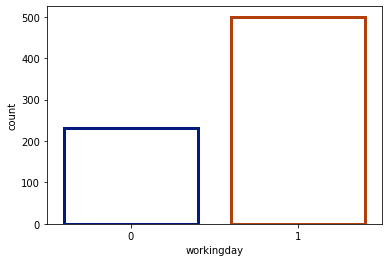

In [235]:
sns.countplot(x="workingday", data=bike_rent,
                   facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 3))

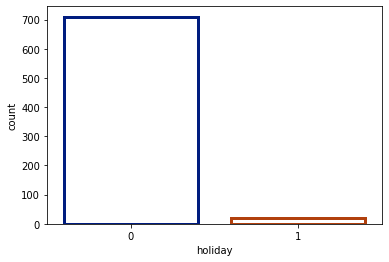

In [236]:
sns.countplot(x="holiday", data=bike_rent,
                   facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 2)) #Rentals are  high on  holidays when compare to weekdays

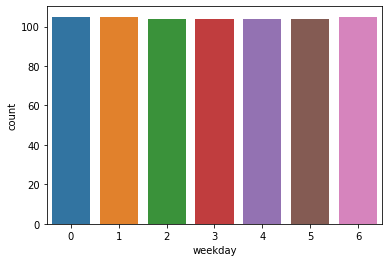

In [237]:
sns.countplot(x="weekday", data=bike_rent)#weekdays are almost same

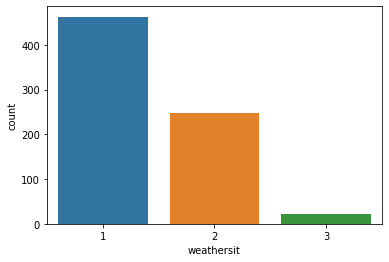

In [238]:
sns.countplot(x="weathersit", data=bike_rent)#weathersit 1 have highest count

##  Outlier Analysis

<Figure size 1440x1440 with 0 Axes>

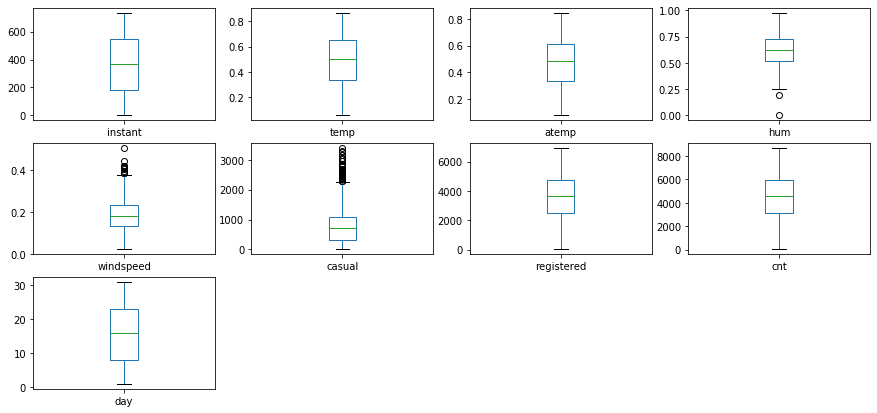

In [239]:
#Outliers
plt.figure(figsize=(20,20))
bike_rent.plot(kind="box",subplots=True,layout=(3,4), figsize=(15,7))
plt.show()

In [240]:
#Deleting Outliers
cname = ['temp','atemp', 'hum','windspeed','casual','registered','cnt']
numeric_data = bike_rent[cname]
         
for i in cname:
    print(i)
    q75, q25 = np.percentile(bike_rent.loc[:,i],[75,25])
    iqr = q75- q25
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    bike_rent.loc[bike_rent.loc[:,i] < min , i] = np.nan
    bike_rent.loc[bike_rent.loc[:,i] > max , i] = np.nan   

temp
atemp
hum
windspeed
casual
registered
cnt


In [241]:
pd.isnull(bike_rent).sum()

instant        0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
day            0
dtype: int64

In [242]:
#1. Imputing Missing value    
#Actual data.iloc[41,10] = 0.506364
bike_rent['hum'] = bike_rent['hum'].fillna(bike_rent['hum'].mean()) # = 0.4989

In [243]:
#2. Imputing windspeed      
#Actual data.iloc[41,11] = 0.10855
bike_rent['windspeed'] = bike_rent['windspeed'].fillna(bike_rent['windspeed'].median()) #=0.1076 

In [244]:
#3. imputing missing casual
bike_rent['casual'] = bike_rent['casual'].fillna(bike_rent['cnt']-bike_rent['registered']) # we saw the values are closer this way that is 245

In [245]:
pd.isnull(bike_rent).sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

## Feature Selection

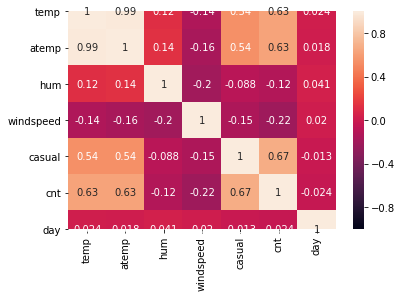

In [246]:
#drawing correlation matrix between all  numeric variables and analyse what are the variables are important
# heat map
#plt.figure(figsize=(15, 9))
#corr = data.corr()
#sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, vmax=1)
#heat map to understand the corelation of continious variable

colname = ['temp','atemp', 'hum','windspeed','casual','cnt','day']
heat_map = bike_rent[colname]
sns.heatmap(heat_map.corr(), vmin=-1.00, vmax=1.00, annot=True)
# we have made heat map to understand the corelation of continious variable

In [247]:
#Dropping variables
#data1 = data.copy()
bike_rent = bike_rent.drop(['instant','atemp','casual','day','registered'], axis=1) 
#instant is unique for all observations hence has no significance
#atemp is strongly correlated with temp

In [248]:
bike_rent.head() #After Drop out dataset contains

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600.0


## Anova test

In [249]:
#since the target variable is continuous
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from scipy import stats

In [250]:
mod1 = ols('cnt ~ season', data = bike_rent).fit()
aov_table1 = sm.stats.anova_lm(mod1, type=2)
print(aov_table1)

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN


In [251]:
mod2 = ols('cnt ~ yr', data = bike_rent).fit()
aov_table2 = sm.stats.anova_lm(mod2, type=2)
print(aov_table2)

             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN


In [252]:
mod3 = ols('cnt ~ mnth', data = bike_rent).fit()
aov_table3 = sm.stats.anova_lm(mod3, type=2)
print(aov_table3)

             df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN


In [253]:
mod4 = ols('cnt ~ holiday', data = bike_rent).fit()
aov_table4 = sm.stats.anova_lm(mod4, type=2)
print(aov_table4)

             df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN


In [254]:
mod5 = ols('cnt ~ weekday', data = bike_rent).fit()
aov_table5 = sm.stats.anova_lm(mod5, type=2)
print(aov_table5)

             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.765902e+07  2.943170e+06  0.782862  0.583494
Residual  724.0  2.721876e+09  3.759498e+06       NaN       NaN


In [255]:
mod6 = ols('cnt ~ workingday', data = bike_rent).fit()
aov_table6 = sm.stats.anova_lm(mod6, type=2)
print(aov_table6)

               df        sum_sq       mean_sq         F    PR(>F)
workingday    1.0  1.024604e+07  1.024604e+07  2.736742  0.098495
Residual    729.0  2.729289e+09  3.743881e+06       NaN       NaN


In [256]:
mod7 = ols('cnt ~ weathersit', data = bike_rent).fit()
aov_table7 = sm.stats.anova_lm(mod7, type=1)
print(aov_table7)

               df        sum_sq       mean_sq          F        PR(>F)
weathersit    2.0  2.716446e+08  1.358223e+08  40.066045  3.106317e-17
Residual    728.0  2.467891e+09  3.389960e+06        NaN           NaN


In [257]:
#from anova and feature importance plotting of random forest, we decided to drop holiday and workingday
bike_rent = bike_rent.drop(['holiday', 'workingday'], axis=1)

In [258]:
bike_rent.head()
#dataScale = data.copy()
#dataScale.head()

,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0


## Feature Scaling

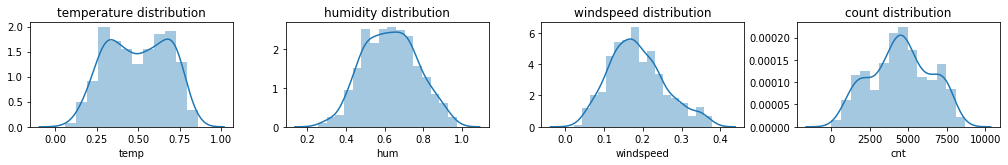

In [259]:
#Scaling for Continious variable 
plt.figure(figsize=(14,4))

plt.subplot(2,4,1)
sns.distplot(bike_rent['temp'])
plt.title('temperature distribution')

plt.subplot(2,4,2)
sns.distplot(bike_rent['hum'])
plt.title('humidity distribution')

plt.subplot(2,4,3)
sns.distplot(bike_rent['windspeed'])
plt.title('windspeed distribution')

plt.subplot(2,4,4)
sns.distplot(bike_rent['cnt'])
plt.title('count distribution')

plt.tight_layout()

#All our continuous variables are already normalized except the target variable which we prefer not to scale because its variation are spread quite widely and after scaling, the difference between the number is diminishing. 

## Modeling

In [260]:
##Sampling: dividing  Test and train data  using sklearn 
from sklearn.model_selection import train_test_split,KFold, cross_val_score, cross_val_predict

#Random sample selection 
train, test = train_test_split(bike_rent, test_size = 0.20, random_state = 100)
train.to_csv("TrainFile_BikeRenting.csv", index=False)
test.to_csv("TestFile_BikeRenting.csv", index=False)

In [261]:
bike_rent.shape, test.shape , train.shape

((731, 9), (147, 9), (584, 9))

In [262]:
from sklearn import metrics
def performance(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

### 1. Decision Tree 

In [263]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 6, random_state=123).fit(train.iloc[:,0:8],train.iloc[:,8])
prediction_dt = dt.predict(test.iloc[:,0:8])
prediction_dt

array([4185.62790698, 6853.        , 4185.62790698, 4195.33333333,
       4836.17105263, 3171.6       , 4836.17105263, 4185.62790698,
       6853.        , 4195.33333333, 6853.        , 6853.        ,
       4254.5       , 6416.        , 1817.        , 7597.89189189,
       4836.17105263, 1824.14285714, 5068.36363636, 6853.        ,
       7597.89189189, 4185.62790698, 5352.25      , 1278.        ,
       3421.5       , 4530.11111111, 5930.        , 4836.17105263,
       7597.89189189, 4195.33333333, 6853.        , 7597.89189189,
       4185.62790698, 6737.30769231,  705.        , 3261.        ,
       4836.17105263, 5068.36363636, 1278.        , 6853.        ,
       4530.11111111, 4254.5       , 5068.36363636, 4195.33333333,
       5367.75      , 6853.        , 1994.90909091, 4185.62790698,
       5068.36363636, 1994.90909091, 6853.        , 4185.62790698,
       5367.75      , 6853.        ,  727.        , 5756.9       ,
       3845.57142857, 5352.25      , 2424.        , 5068.36363

In [264]:
#error matrix
performance(test.iloc[:,8],prediction_dt)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_dt[6], test.iloc[6,8]

MSE: 576621.9816371171
RMSE: 759.3562942631852
MAPE: 16.68260112239678
R-Sq: 0.8308817145626113
                           
Perdicted Vs Actual value: 


(4836.171052631579, 4458.0)

In [265]:
dt.score(train.iloc[:,0:8],train.iloc[:,8])

0.9209045002047951

### 2. Random Forest 

In [266]:
rf = RandomForestRegressor(n_estimators = 700, random_state = 126).fit(train.iloc[:,0:8],train.iloc[:,8])
prediction_rf = rf.predict(test.iloc[:,0:8])
prediction_rf

array([4689.95428571, 6922.10428571, 3930.59714286, 4868.82714286,
       5023.24142857, 3250.56857143, 4561.26142857, 4101.75857143,
       6414.04142857, 4463.81142857, 6456.29428571, 7355.99142857,
       3971.89857143, 5524.68142857, 2300.83285714, 7172.52285714,
       5125.15857143, 1594.51571429, 4764.71428571, 6206.80571429,
       7657.12428571, 3736.55428571, 6462.84571429, 1408.62285714,
       3598.29      , 4192.94571429, 6254.98      , 4937.55285714,
       7568.75571429, 4327.50571429, 6575.57285714, 7606.30428571,
       3495.51285714, 6491.29571429, 1813.44571429, 3862.16285714,
       4541.77714286, 5442.78714286, 1332.92714286, 6276.39285714,
       4418.12285714, 3707.79142857, 5326.69142857, 4206.37428571,
       6088.65571429, 6270.49428571, 1792.50571429, 3746.74      ,
       5409.15142857, 2237.09571429, 7403.46714286, 4087.55285714,
       5283.56142857, 7263.54857143, 2275.49142857, 6109.48571429,
       4189.51      , 5226.80857143, 2670.27142857, 5395.56285

In [267]:
performance(test.iloc[:,8],prediction_rf)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_rf[1], test.iloc[1,8]

MSE: 355025.5025178815
RMSE: 595.8401652439029
MAPE: 13.443422955844722
R-Sq: 0.8958740627578833
                           
Perdicted Vs Actual value: 


(6922.104285714286, 6825.0)

In [268]:
rf.score(train.iloc[:,0:8],train.iloc[:,8])

0.9827507580171687

### 3. Linear Regression

In [269]:
ln_model = LinearRegression().fit(train.iloc[:,0:8],train.iloc[:,8])
prediction_lr = ln_model.predict(test.iloc[:,0:8])
prediction_lr 

array([4770.97415752, 6530.61199226, 3521.99990085, 5527.58732386,
       4686.85111153, 4042.94435259, 5087.12765323, 4245.57765257,
       6236.2737652 , 5599.02755869, 6429.25931572, 7199.39822111,
       3962.79882877, 4977.31233361, 2400.04366244, 7138.2321118 ,
       5445.79901344, 1428.6928155 , 4373.46869552, 5459.46828259,
       7264.06093895, 4589.58544873, 6699.49710809, 1439.12565656,
       3186.76693131, 4552.46147716, 6390.83647618, 3864.40436742,
       6622.65169003, 4977.48527811, 7279.90928808, 7257.55069161,
       3992.18399944, 5624.37872155, 2543.48363291, 3925.80618291,
       4912.63721598, 5807.28294697, 1243.72597827, 5418.52296664,
       4526.35548337, 3269.04599419, 5014.03695058, 6346.77647347,
       5411.66323569, 7728.2624843 , 1448.28237418, 4489.63940999,
       4820.30874831, 2304.27513135, 6230.15244318, 4474.49795146,
       5050.45451953, 6299.79926039, 3098.543545  , 7794.65679112,
       4893.86164274, 4997.94623522, 2103.61262942, 5869.00971

In [270]:
performance(test.iloc[:,8],prediction_lr1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_lr[1], test.iloc[1,8]

MSE: 797456.574894587
RMSE: 893.004241252295
MAPE: 19.55961473732635
R-Sq: 0.7661128209610664
                           
Perdicted Vs Actual value: 


(6530.611992260372, 6825.0)

In [271]:
ln_model.score(train.iloc[:,0:8],train.iloc[:,8])

0.7970563190848906

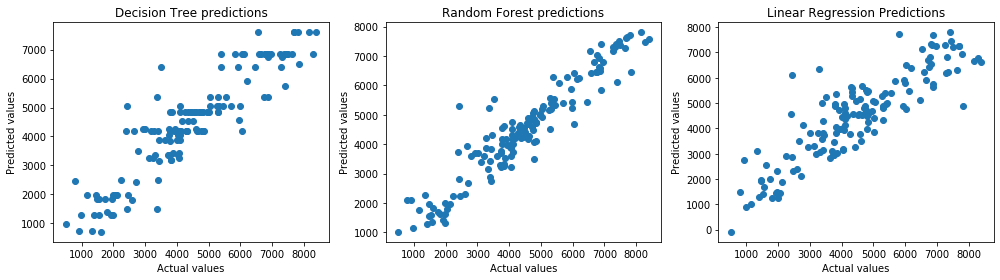

In [272]:
#Ploting to understand the spread of predicted data. 

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.title('Decision Tree predictions')
plt.scatter(test.iloc[:,8] , prediction_dt)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,2)
plt.title('Random Forest predictions')
plt.scatter(test.iloc[:,8] , prediction_rf)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1,3,3)
plt.title('Linear Regression Predictions')
plt.scatter(test.iloc[:,8] , prediction_lr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.tight_layout()

### Saving Results

In [273]:
test['DT Predictions'] = prediction_dt
test['RF Predictions'] = prediction_rf
test['LR Prediction'] = prediction_lr

train.to_csv("TrainFile1onwhichModelistrained.csv", index=False)
test.to_csv("TestFile1withresultsfromModel.csv", index=False)

C:\Users\Sridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sridhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat